Scenario

You are working as an analyst with this internet service provider. You are provided with this historical data about your company's customers and their churn trends. Your task is to build a machine learning model that will help the company identify customers that are more likely to default/churn and thus prevent losses from such customers.

Instructions

In this lab, we will first take a look at the degree of imbalance in the data and correct it using the techniques we learned on the class.

1. Import the required libraries and modules that you would need.

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

2. Read that data into Python and call the dataframe churnData.

In [46]:
churnData = pd.read_csv('files_for_lab/Customer-Churn.csv')

In [3]:
churnData.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


3. Check the datatypes of all the columns in the data. You would see that the column TotalCharges is object type. Convert this column into numeric type using pd.to_numeric function.

In [4]:
churnData.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [47]:
churnData['TotalCharges'] = pd.to_numeric(churnData['TotalCharges'], errors='coerce')

4. Check for null values in the dataframe. Replace the null values.

In [6]:
churnData.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [48]:
churnData.TotalCharges.value_counts(dropna=False)

NaN        11
20.20      11
19.75       9
20.05       8
19.90       8
           ..
6849.40     1
692.35      1
130.15      1
3211.90     1
6844.50     1
Name: TotalCharges, Length: 6531, dtype: int64

In [49]:
churnData.TotalCharges.dtype

dtype('float64')

In [50]:
churnData = churnData.fillna(np.mean(churnData['TotalCharges']))

In [51]:
churnData.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

5. Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:

In [52]:
X = churnData[['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges']].copy()

In [12]:
X.head()

,tenure,SeniorCitizen,MonthlyCharges,TotalCharges
0,1,0,29.85,29.85
1,34,0,56.95,1889.50
2,2,0,53.85,108.15
3,45,0,42.30,1840.75
4,2,0,70.70,151.65


a. Scale the features either by using normalizer or a standard scaler.

In [53]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler().fit(X)
X_scaled = ss.transform(X)

b. Split the data into a training set and a test set.

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, churnData['Churn'], random_state=0)

c. Fit a logistic regression model on the training data.

In [55]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X_train, y_train)
clf.score(X_train, y_train)

0.7913669064748201

d. Check the accuracy on the test data.

In [56]:
clf.score(X_test, y_test)

0.7830777967064169

              precision    recall  f1-score   support

          No       0.82      0.90      0.86      1298
         Yes       0.62      0.46      0.53       463

    accuracy                           0.78      1761
   macro avg       0.72      0.68      0.69      1761
weighted avg       0.77      0.78      0.77      1761



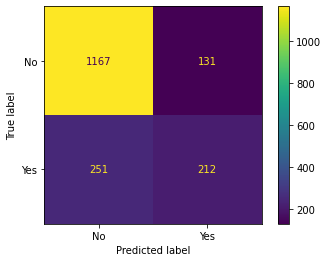

In [72]:
from sklearn.metrics import classification_report
pred = clf.predict(X_test)
log_model_unbalanced = classification_report(y_test, pred)
print(log_model_unbalanced)
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf, X_test, y_test)


## Managing imbalance in the dataset

6. Check for the imbalance.

In [58]:
y = churnData['Churn']
y.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

7. Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes.

In [59]:
X_scaled = pd.DataFrame(X_scaled)
data = pd.concat([X_scaled,y], axis=1)

In [60]:
majority_class = data[data['Churn'] == 'No'] 
minority_class = data[data['Churn'] == 'Yes']
from sklearn.utils import resample

In [61]:
#Upsampling
minority_class_oversampled = resample(minority_class, 
                                  replace=True, 
                                  n_samples = len(majority_class))

churnData_upsampled = pd.concat([majority_class, minority_class_oversampled], axis=0)

In [62]:
#Downsampling
majority_class_undersampled = resample(majority_class, 
                                  replace=True, 
                                  n_samples = len(minority_class))

churnData_downsampled = pd.concat([minority_class, majority_class_undersampled], axis=0)

8. Each time fit the model and see how the accuracy of the model is.

train data accuracy:  0.7392088648370055
test data accuracy:  0.7352145342095091
              precision    recall  f1-score   support

          No       0.88      0.72      0.79      1298
         Yes       0.48      0.72      0.57       463

    accuracy                           0.72      1761
   macro avg       0.68      0.72      0.68      1761
weighted avg       0.77      0.72      0.73      1761



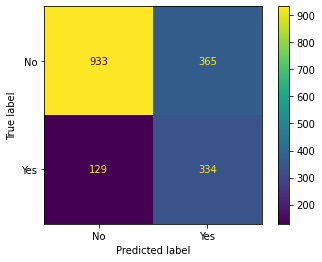

In [63]:
# upsampled model
y = churnData_upsampled['Churn']
X = churnData_upsampled.drop(['Churn'], axis=1)

X_train_u, X_test_u, y_train_u, y_test_u= train_test_split(X, y, random_state=0)

clf_u = LogisticRegression().fit(X_train_u, y_train_u)
print('train data accuracy: ', clf_u.score(X_train_u, y_train_u))
print('test data accuracy: ', clf_u.score(X_test_u, y_test_u))

pred = clf_u.predict(X_test)
log_model_upsampled = classification_report(y_test, pred)
print(log_model_upsampled)

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf_u, X_test, y_test)

train data accuracy:  0.7377809489832322
test data accuracy:  0.7005347593582888
              precision    recall  f1-score   support

          No       0.87      0.71      0.79      1298
         Yes       0.47      0.71      0.57       463

    accuracy                           0.71      1761
   macro avg       0.67      0.71      0.68      1761
weighted avg       0.77      0.71      0.73      1761



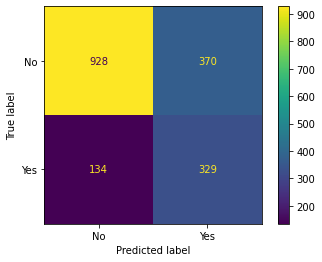

In [64]:
# downsampled model
y = churnData_downsampled['Churn']
X = churnData_downsampled.drop(['Churn'], axis=1)

X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X, y, random_state=0)

clf_d = LogisticRegression().fit(X_train_d, y_train_d)
print('train data accuracy: ', clf_d.score(X_train_d, y_train_d))
print('test data accuracy: ', clf_d.score(X_test_d, y_test_d))

pred = clf_d.predict(X_test)
log_model_downsampled = classification_report(y_test, pred)
print(log_model_downsampled)

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf_d, X_test, y_test)

In [65]:
print("unbalanced: ",log_model_unbalanced)
print('upsampled: ',log_model_upsampled)
print('downsampled: ',log_model_downsampled)

unbalanced:                precision    recall  f1-score   support

          No       0.82      0.90      0.86      1298
         Yes       0.62      0.46      0.53       463

    accuracy                           0.78      1761
   macro avg       0.72      0.68      0.69      1761
weighted avg       0.77      0.78      0.77      1761

upsampled:                precision    recall  f1-score   support

          No       0.88      0.72      0.79      1298
         Yes       0.48      0.72      0.57       463

    accuracy                           0.72      1761
   macro avg       0.68      0.72      0.68      1761
weighted avg       0.77      0.72      0.73      1761

downsampled:                precision    recall  f1-score   support

          No       0.87      0.71      0.79      1298
         Yes       0.47      0.71      0.57       463

    accuracy                           0.71      1761
   macro avg       0.67      0.71      0.68      1761
weighted avg       0.77      0.71  

The model on the imbalanced data underpredicts the churn customers, it has a really low precision score. This is not ideal for this situation because if the model is missing the churn customers the company will not reach out to those customers and will lose their business.

The models from the upsampled data and downsampled produce very similar results to eachother. They both have an increased precision score compared to the first model, and the recall score is very similar.

In this case a model built from either an upsampled or downsampled dataset produced better prediction than the imbalanced dataset. 